In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import seaborn as sns

In [2]:
#Download of tickers

tickers = ['NVDA', 'GOOG', 'AMZN', 'AAPL', 'TXN', 'NEM', 'BAC', 'MCD', 'CMG']
df = yf.download(tickers, start = '2007-01-01', end = dt.date.today())['Close']

[*********************100%%**********************]  9 of 9 completed


In [3]:
weight = np.random.random(len(tickers))
weight /= np.sum(weight)

In [4]:
df

,AAPL,AMZN,BAC,CMG,GOOG,MCD,NEM,NVDA,TXN
Date,,,,,,,,,
2007-01-03,2.992857,1.935000,53.330002,56.410000,11.646098,43.869999,44.200001,6.013333,28.559999
2007-01-04,3.059286,1.945000,53.669998,55.380001,12.036385,43.540001,44.000000,5.985000,29.100000
2007-01-05,3.037500,1.918500,53.240002,55.000000,12.134268,43.540001,43.650002,5.610000,28.760000
2007-01-08,3.052500,1.875000,53.450001,56.049999,12.044355,43.709999,42.840000,5.651667,28.900000
2007-01-09,3.306071,1.889000,53.500000,56.450001,12.092176,43.790001,42.970001,5.541667,28.840000
...,...,...,...,...,...,...,...,...,...
2024-03-11,172.750000,171.960007,35.889999,2662.590088,138.940002,294.820007,35.240002,857.739990,174.190002
2024-03-12,173.229996,175.389999,35.959999,2719.820068,139.619995,294.309998,33.880001,919.130005,174.800003
2024-03-13,171.130005,176.559998,36.080002,2722.689941,140.770004,282.859985,34.369999,908.880005,172.679993


In [5]:
#Initial investment 
Inintial_inv = 1000000

log_return = np.log(df/df.shift(1))

In [6]:
log_return = log_return.dropna()

<AxesSubplot: >

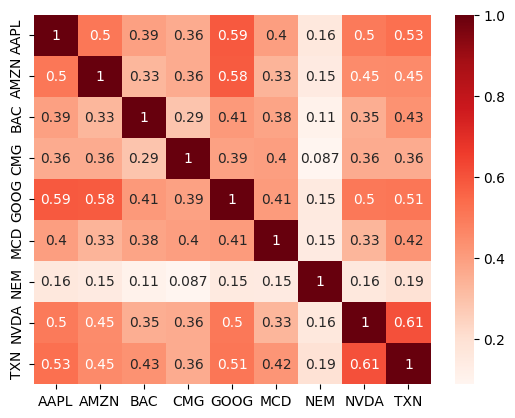

In [7]:
#Newmont has weak corelation compared to the rest of PFO, but the rest is rather highly positively correlated so Beta should be quite high - if violatility is high portfolo is risky
sns.heatmap(log_return.corr(), cmap = 'Reds', annot=True)

In [8]:
#Creating pfo avg daily return and rolling profit instead of daily 
pfo_avg = (log_return*weight).sum(axis=1)
log_return = log_return.rolling(window = 5).sum()

In [9]:
pfo_avg

Date
2007-01-04    0.007740
2007-01-05   -0.007807
2007-01-08    0.001471
2007-01-09    0.003627
2007-01-10    0.008533
                ...   
2024-03-11    0.010307
2024-03-12    0.004777
2024-03-13   -0.003594
2024-03-14    0.000751
2024-03-15   -0.004826
Length: 4329, dtype: float64

In [10]:
log_return = log_return.dropna()

In [15]:
#Creating cov matrix to calculate std and EX of pfo
cov_matrix = log_return.cov()

In [18]:
pfo_ev = (log_return.mean())@weight
pfo_std = np.sqrt(weight.T @ cov_matrix @ weight)

In [16]:
cov_matrix

,AAPL,AMZN,BAC,CMG,GOOG,MCD,NEM,NVDA,TXN
AAPL,0.001867,0.001053,0.000969,0.000850,0.000989,0.000385,0.000402,0.001424,0.000743
AMZN,0.001053,0.002610,0.001033,0.001037,0.001119,0.000404,0.000355,0.001557,0.000819
BAC,0.000969,0.001033,0.004803,0.001115,0.000960,0.000539,0.000205,0.001618,0.000983
CMG,0.000850,0.001037,0.001115,0.002962,0.000774,0.000543,0.000263,0.001263,0.000709
GOOG,0.000989,0.001119,0.000960,0.000774,0.001590,0.000379,0.000305,0.001275,0.000682
MCD,0.000385,0.000404,0.000539,0.000543,0.000379,0.000679,0.000189,0.000478,0.000331
NEM,0.000402,0.000355,0.000205,0.000263,0.000305,0.000189,0.002758,0.000578,0.000372
NVDA,0.001424,0.001557,0.001618,0.001263,0.001275,0.000478,0.000578,0.004630,0.001409
TXN,0.000743,0.000819,0.000983,0.000709,0.000682,0.000331,0.000372,0.001409,0.001288


,AAPL,AMZN,BAC,CMG,GOOG,MCD,NEM,NVDA,TXN
Date,,,,,,,,,
2007-01-10,0.146278,-0.040876,0.004677,-0.003552,0.045711,0.008851,-0.042284,-0.033538,0.026604
2007-01-11,0.111877,-0.039324,-0.007669,0.040519,0.033493,0.022034,-0.034215,-0.032549,-0.002408
2007-01-12,0.106630,-0.004440,0.002626,0.057926,0.035904,0.015497,-0.010131,0.045588,0.010377
2007-01-16,0.127576,0.030465,-0.000187,0.075738,0.041915,0.019484,-0.006322,0.039890,-0.000692
2007-01-17,0.025385,0.002643,-0.003370,0.070940,0.023974,0.024141,-0.004432,0.038353,0.010005
...,...,...,...,...,...,...,...,...,...
2024-03-11,-0.013512,-0.032159,0.020834,-0.021443,0.034711,0.013248,0.051234,0.006280,0.010097
2024-03-12,0.018116,0.007267,0.015978,0.003126,0.042728,0.006032,0.016067,0.066914,0.024086
2024-03-13,0.011815,0.017426,0.018462,0.012027,0.060092,-0.034982,0.022063,0.024368,0.004702


71214.23821763486

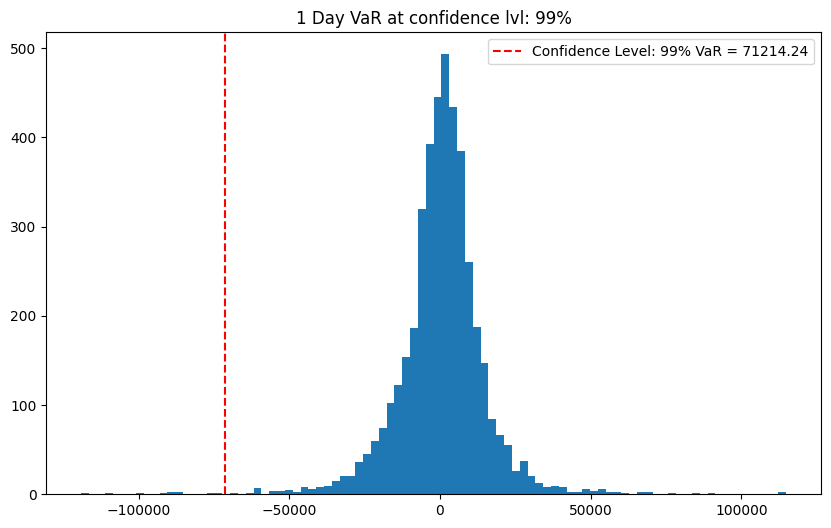

In [107]:
confidence_lvl = 0.99
returns = pfo_avg*Inintial_inv
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)


plt.figure(figsize=(10,6))
plt.hist(returns, bins = 90)
plt.axvline(-VaR, color='r', linestyle='dashed', label = f'Confidence Level: {confidence_lvl:.0%} VaR = {np.round(VaR,2)}')
plt.legend()
plt.title(f'1 Day VaR at confidence lvl: {confidence_lvl:.0%}')

VaR



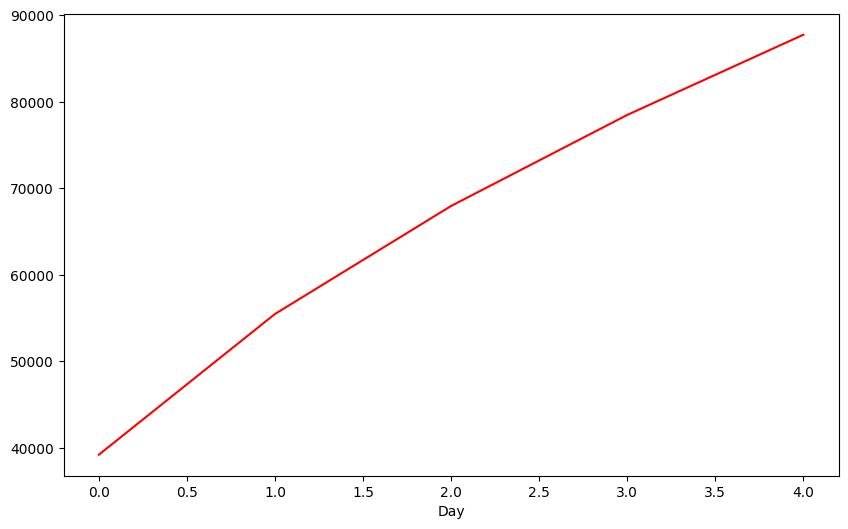

In [100]:
#Portfolio will not lose more than 90k in 5 days with 90% confidence
confidence_lvl = 0.9
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)
var_array = []
num_days = int(5)

for x in range(1, num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))
    
plt.figure(figsize=(10,6))
plt.xlabel('Day')
plt.plot(var_array, 'r')

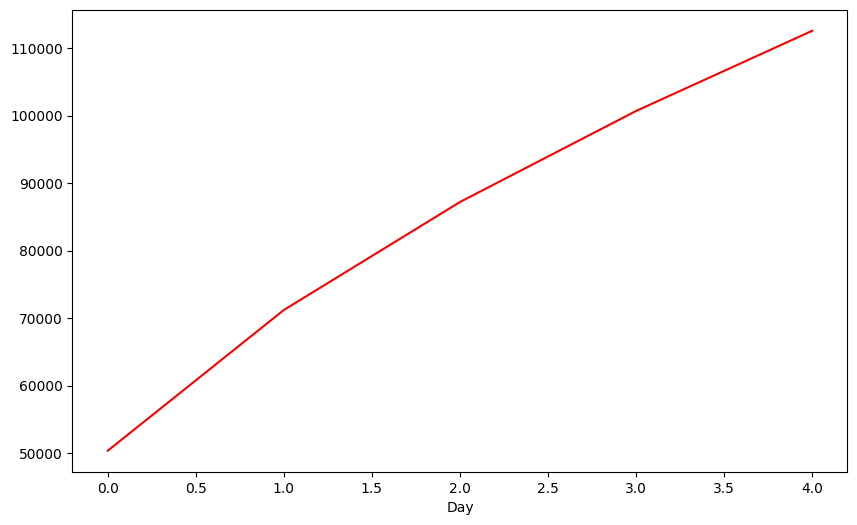

In [101]:
#Portfolio will not lose more than 110k in 5 days with 95% confidence
confidence_lvl = 0.95
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)
var_array = []
num_days = int(5)

for x in range(1, num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))

plt.figure(figsize=(10,6))
plt.xlabel('Day')
plt.plot(var_array, 'r')


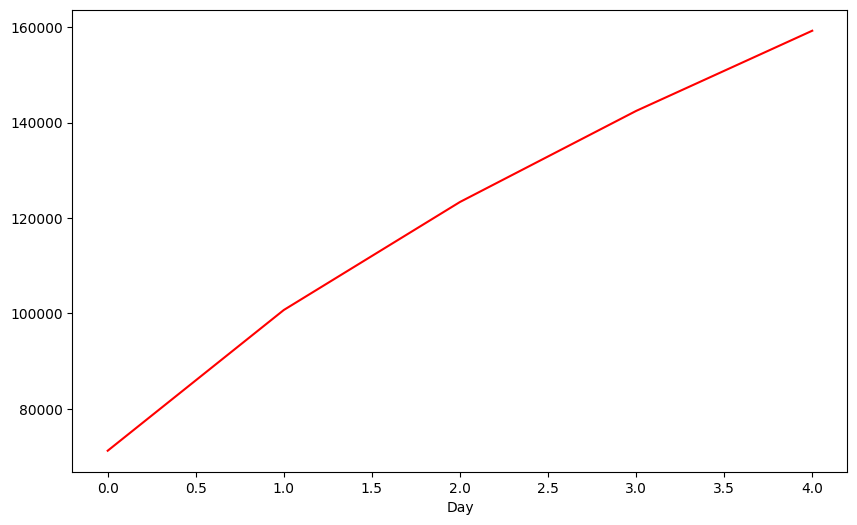

In [102]:
#Portfolio will not lose more than 160k in 5 days with 99% confidence
confidence_lvl = 0.99
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)
var_array = []
num_days = int(5)

for x in range(1, num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))

plt.figure(figsize=(10,6))
plt.xlabel('Day')
plt.plot(var_array, 'r')